In [1]:
#!pip install nltk


In [2]:
import pandas as pd
import numpy as np
import nltk
import re
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/karlaorozco/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/karlaorozco/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/karlaorozco/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/karlaorozco/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
#MAC
#path_X1 = '/Users/karlaorozco/OneDrive_UniversidadEAFIT/Escritorio/INFORMACIÓN PERSONAL/1_MAESTRIA/SEMESTRE1/PI/Notebooks/Company_Tweet.csv'
#path_X2 = '/Users/karlaorozco/OneDrive_UniversidadEAFIT/Escritorio/INFORMACIÓN PERSONAL/1_MAESTRIA/SEMESTRE1/PI/Notebooks/Company1.csv'
#path_X3 = '/Users/karlaorozco/OneDrive_UniversidadEAFIT/Escritorio/INFORMACIÓN PERSONAL/1_MAESTRIA/SEMESTRE1/PI/Notebooks/Tweet.csv'
#path_X4 = '/Users/karlaorozco/OneDrive_UniversidadEAFIT/Escritorio/INFORMACIÓN PERSONAL/1_MAESTRIA/SEMESTRE1/PI/Notebooks/CompanyValues.csv'

#PC
path_X1 = '/Users/karlaorozco/OneDrive - Universidad EAFIT/Escritorio/INFORMACIÓN PERSONAL/1_MAESTRIA_ESTE_SÍ/SEMESTRE1/PI/Notebooks/Company_Tweet.csv'
path_X2 = '/Users/karlaorozco/OneDrive - Universidad EAFIT/Escritorio/INFORMACIÓN PERSONAL/1_MAESTRIA_ESTE_SÍ/SEMESTRE1/PI/Notebooks/Company1.csv'
path_X3 = '/Users/karlaorozco/OneDrive - Universidad EAFIT/Escritorio/INFORMACIÓN PERSONAL/1_MAESTRIA_ESTE_SÍ/SEMESTRE1/PI/Notebooks/Tweet.csv'
path_X4 = '/Users/karlaorozco/OneDrive - Universidad EAFIT/Escritorio/INFORMACIÓN PERSONAL/1_MAESTRIA_ESTE_SÍ/SEMESTRE1/PI/Notebooks/CompanyValues.csv'
#/Users/karlaorozco/OneDrive - Universidad EAFIT/Escritorio/INFORMACIÓN PERSONAL/1_MAESTRIA_ESTE_SÍ/SEMESTRE1/PI

In [4]:
company_tweet = pd.read_csv(path_X1)
company = pd.read_csv(path_X2)
tweet = pd.read_csv(path_X3)
company_values = pd.read_csv(path_X4)
inicial_completo = pd.read_csv('InicialCompleto.csv')
tweet.head(3)


,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num
0,550441509175443456,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1
1,550441672312512512,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0
2,550441732014223360,DozenStocks,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0


Cambiar formato de la fecha

In [5]:
tweet['post_date'] = pd.to_datetime(tweet['post_date'],unit='s')
tweet.head(3)

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num
0,550441509175443456,VisualStockRSRC,2015-01-01 00:00:57,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1
1,550441672312512512,KeralaGuy77,2015-01-01 00:01:36,Insanity of today weirdo massive selling. $aap...,0,0,0
2,550441732014223360,DozenStocks,2015-01-01 00:01:50,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0


Quitar la hora

In [6]:
#tweet['post_date'] = tweet['post_date'].dt.date

In [7]:
#tweet.head(3)

In [8]:
#tweet=tweet.loc[tweet['tweet_id'].isin(tweet['tweet_id'])]
#ticker_symbol_group = company_tweet.groupby('tweet_id')['ticker_symbol'].unique()

Renombrar y mostrar la serie:

In [9]:
#ticker_symbol_group.rename("ticker_symbol_group", inplace=True)
#ticker_symbol_group.head(2)

In [10]:
#tweet = tweet.merge(ticker_symbol_group, how='left',left_on='tweet_id',right_on='tweet_id')
#tweet.head(2)

# Analisis Exploratorio con un data set de 10000 Tweets

In [11]:
tweet_head = tweet.head(10000).copy()

#tweet_head['body_tokenized'] = tweet_head.apply(lambda row: nltk.word_tokenize(str(row['body'])), axis=1)

#tweet_head['body_tokenized']

In [12]:
# stopwords en nltk
 
#stop_words_nltk = set(stopwords.words('english'))
#print(f'Stopwords length: {len(stop_words_nltk)}')
#print(f'Stopwords: {stop_words_nltk}')

## Tokenización

In [13]:
#Remover los tiker symbol o las URL del cuerpo de los tweets:
tweet_head['body_trusted']=tweet_head['body'].apply(lambda x: re.sub(r'\$\S+|http\S+','',x)) #Remover los ticker symbol o las URL

In [14]:
#Tokenizar:
tweet_head['body_tokenized'] = tweet_head['body_trusted'].apply(lambda x: nltk.word_tokenize(str(x)) )

## Remoción de Caracteres Especiales y Stopwords

In [15]:
from nltk.corpus import stopwords
import re
import nltk
nltk.download('stopwords')

stop_words_nltk = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/karlaorozco/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
# ELIMINAR caracteres que no pertenezcal al alfabeto
# TRANFORMAR tokens a minuscula y ELIMINAR tokens de long = 1
# REMOVER stop words
tweet_head['body_refined']=tweet_head['body_tokenized'] #Crear columna igual a "body_tokenized"
tweet_head['body_refined']=tweet_head['body_refined'].apply(lambda tokens: [w for w in tokens if w.isalpha()] ) #alphabet letters
tweet_head['body_refined']=tweet_head['body_refined'].apply(lambda tokens: [w.lower() for w in tokens if len(w)>1] ) #lower and len > 1
tweet_head['body_refined']=tweet_head['body_refined'].apply(lambda tokens: [w for w in tokens if w not in stop_words_nltk] ) #not stop word

In [17]:
tweet_head.loc[5].at['body'], tweet_head.loc[5].at['body_refined']

('Swing Trading: Up To 8.91% Return In 14 Days http://ow.ly/GDkrL #swingtrading #forecast #techstock $MWW $AAPL $TSLA',
 ['swing',
  'trading',
  'return',
  'days',
  'swingtrading',
  'forecast',
  'techstock'])

In [18]:
tweet_head.head(2)

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,body_trusted,body_tokenized,body_refined
0,550441509175443456,VisualStockRSRC,2015-01-01 00:00:57,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,lx21 made on -Check it out! Learn #howtotr...,"[lx21, made, on, -Check, it, out, !, Learn, #,...","[made, learn, howtotrade]"
1,550441672312512512,KeralaGuy77,2015-01-01 00:01:36,Insanity of today weirdo massive selling. $aap...,0,0,0,Insanity of today weirdo massive selling. bid...,"[Insanity, of, today, weirdo, massive, selling...","[insanity, today, weirdo, massive, selling, bi..."


## Lemmatización

In [19]:
# Lemmatization con NLTK
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [20]:
tweet_head['lemmatized_tokens']=tweet_head['body_refined'].apply(lambda tokens: [wordnet_lemmatizer.lemmatize(w) for w in tokens] )
tweet_head['clean_tweet'] = tweet_head['lemmatized_tokens'].apply(lambda tokens: ' '.join(tokens))

In [21]:
tweet_head.head(1)

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,body_trusted,body_tokenized,body_refined,lemmatized_tokens,clean_tweet
0,550441509175443456,VisualStockRSRC,2015-01-01 00:00:57,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,lx21 made on -Check it out! Learn #howtotr...,"[lx21, made, on, -Check, it, out, !, Learn, #,...","[made, learn, howtotrade]","[made, learn, howtotrade]",made learn howtotrade


## Análisis de Sentimientos

In [22]:
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/karlaorozco/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [23]:
tweet_head['score_vader'] = tweet_head['clean_tweet'].apply(lambda c: SentimentIntensityAnalyzer().polarity_scores(c)['compound'])
tweet_head['score_vader'].head(3)

0    0.0000
1   -0.8271
2    0.0000
Name: score_vader, dtype: float64

In [24]:
conditions = [
    (tweet_head["score_vader"] >= .05),
    (tweet_head["score_vader"] > -.05) & (tweet_head["score_vader"] < .05),
    (tweet_head["score_vader"] <= -.05),
]

choices = ['positive', 'neutral', 'negative']

tweet_head['sentiment'] = np.select(conditions, choices)
tweet_head['sentiment'].value_counts()

neutral     4385
positive    4265
negative    1350
Name: sentiment, dtype: int64

In [25]:
tweet_head.head(3)

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,body_trusted,body_tokenized,body_refined,lemmatized_tokens,clean_tweet,score_vader,sentiment
0,550441509175443456,VisualStockRSRC,2015-01-01 00:00:57,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,lx21 made on -Check it out! Learn #howtotr...,"[lx21, made, on, -Check, it, out, !, Learn, #,...","[made, learn, howtotrade]","[made, learn, howtotrade]",made learn howtotrade,0.0000,neutral
1,550441672312512512,KeralaGuy77,2015-01-01 00:01:36,Insanity of today weirdo massive selling. $aap...,0,0,0,Insanity of today weirdo massive selling. bid...,"[Insanity, of, today, weirdo, massive, selling...","[insanity, today, weirdo, massive, selling, bi...","[insanity, today, weirdo, massive, selling, bi...",insanity today weirdo massive selling bid cent...,-0.8271,negative
2,550441732014223360,DozenStocks,2015-01-01 00:01:50,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0,S&P100 #Stocks Performance mo...,"[S, &, P100, #, Stocks, Performance, more, @]","[stocks, performance]","[stock, performance]",stock performance,0.0000,neutral


## Transformación de Sentimientos en [0, 1, 2]

In [26]:
from sklearn import preprocessing

In [27]:
le = preprocessing.LabelEncoder()
tweet_head['sentiment_code'] = le.fit_transform(tweet_head['sentiment'])

In [28]:
np.unique(tweet_head['sentiment_code'])

array([0, 1, 2])

In [29]:
tweet_head.head(2)

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,body_trusted,body_tokenized,body_refined,lemmatized_tokens,clean_tweet,score_vader,sentiment,sentiment_code
0,550441509175443456,VisualStockRSRC,2015-01-01 00:00:57,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,lx21 made on -Check it out! Learn #howtotr...,"[lx21, made, on, -Check, it, out, !, Learn, #,...","[made, learn, howtotrade]","[made, learn, howtotrade]",made learn howtotrade,0.0000,neutral,1
1,550441672312512512,KeralaGuy77,2015-01-01 00:01:36,Insanity of today weirdo massive selling. $aap...,0,0,0,Insanity of today weirdo massive selling. bid...,"[Insanity, of, today, weirdo, massive, selling...","[insanity, today, weirdo, massive, selling, bi...","[insanity, today, weirdo, massive, selling, bi...",insanity today weirdo massive selling bid cent...,-0.8271,negative,0


## Adicionar empresas de las que habla cada Tweet a la tabla

In [30]:
company_tweet=company_tweet.loc[company_tweet['tweet_id'].isin(tweet_head['tweet_id'])]
ticker_symbol_group = company_tweet.groupby('tweet_id')['ticker_symbol'].unique()

Renombrar y mostrar la serie:

In [31]:
ticker_symbol_group.rename("ticker_symbol_group", inplace=True)
ticker_symbol_group.head(2)

tweet_id
550441509175443456    [AAPL]
550441672312512512    [AAPL]
Name: ticker_symbol_group, dtype: object

## Realizar combinación mencionada entre la tabla agrupada "ticker_symbol_group" y "tweet" por la columna "tweet_id":

In [32]:
tweet_head = tweet_head.merge(ticker_symbol_group, how='left',left_on='tweet_id',right_on='tweet_id')
tweet_head.head(2)

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,body_trusted,body_tokenized,body_refined,lemmatized_tokens,clean_tweet,score_vader,sentiment,sentiment_code,ticker_symbol_group
0,550441509175443456,VisualStockRSRC,2015-01-01 00:00:57,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,lx21 made on -Check it out! Learn #howtotr...,"[lx21, made, on, -Check, it, out, !, Learn, #,...","[made, learn, howtotrade]","[made, learn, howtotrade]",made learn howtotrade,0.0000,neutral,1,[AAPL]
1,550441672312512512,KeralaGuy77,2015-01-01 00:01:36,Insanity of today weirdo massive selling. $aap...,0,0,0,Insanity of today weirdo massive selling. bid...,"[Insanity, of, today, weirdo, massive, selling...","[insanity, today, weirdo, massive, selling, bi...","[insanity, today, weirdo, massive, selling, bi...",insanity today weirdo massive selling bid cent...,-0.8271,negative,0,[AAPL]


# AAPL 

In [33]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

In [34]:
df_aapl_idx = tweet_head.ticker_symbol_group.apply(lambda a: 'AAPL' in a)
df_aapl= tweet_head[df_aapl_idx].copy()

### Negative = 0

In [35]:
df_aapl_negative = df_aapl[df_aapl['sentiment_code']==0]
### JOIN ALL TWEETS NEGATIVE
df_aapl_negative_alltweets  = df_aapl_negative['clean_tweet'].str.cat(sep = ' ')

#EMBEDDINGS

corpus_aapl_negative = [df_aapl_negative_alltweets]
vocabulary_aapl_negative = np.unique(df_aapl_negative_alltweets.split(" "))

pipe_aapl_nega = Pipeline([('count', CountVectorizer(vocabulary=vocabulary_aapl_negative)),
                  ('tfid', TfidfTransformer())]).fit(corpus_aapl_negative)
pipe_aapl_nega['count'].transform(corpus_aapl_negative).toarray()

pipe_aapl_nega['tfid'].idf_

pipe_aapl_nega.transform(corpus_aapl_negative).shape

(1, 1934)

In [36]:
df_aapl.head(2)

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,body_trusted,body_tokenized,body_refined,lemmatized_tokens,clean_tweet,score_vader,sentiment,sentiment_code,ticker_symbol_group
0,550441509175443456,VisualStockRSRC,2015-01-01 00:00:57,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,lx21 made on -Check it out! Learn #howtotr...,"[lx21, made, on, -Check, it, out, !, Learn, #,...","[made, learn, howtotrade]","[made, learn, howtotrade]",made learn howtotrade,0.0000,neutral,1,[AAPL]
1,550441672312512512,KeralaGuy77,2015-01-01 00:01:36,Insanity of today weirdo massive selling. $aap...,0,0,0,Insanity of today weirdo massive selling. bid...,"[Insanity, of, today, weirdo, massive, selling...","[insanity, today, weirdo, massive, selling, bi...","[insanity, today, weirdo, massive, selling, bi...",insanity today weirdo massive selling bid cent...,-0.8271,negative,0,[AAPL]


Sacamos el Total_Engagement

In [37]:
df_aapl['total_engagement']  = df_aapl['comment_num'] + df_aapl['retweet_num'] + df_aapl['like_num']
#Quitar la hora de la comlumna post_date
df_aapl['post_date'] = df_aapl['post_date'].dt.date
df_aapl.head(2)

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,body_trusted,body_tokenized,body_refined,lemmatized_tokens,clean_tweet,score_vader,sentiment,sentiment_code,ticker_symbol_group,total_engagement
0,550441509175443456,VisualStockRSRC,2015-01-01,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,lx21 made on -Check it out! Learn #howtotr...,"[lx21, made, on, -Check, it, out, !, Learn, #,...","[made, learn, howtotrade]","[made, learn, howtotrade]",made learn howtotrade,0.0000,neutral,1,[AAPL],1
1,550441672312512512,KeralaGuy77,2015-01-01,Insanity of today weirdo massive selling. $aap...,0,0,0,Insanity of today weirdo massive selling. bid...,"[Insanity, of, today, weirdo, massive, selling...","[insanity, today, weirdo, massive, selling, bi...","[insanity, today, weirdo, massive, selling, bi...",insanity today weirdo massive selling bid cent...,-0.8271,negative,0,[AAPL],0


In [38]:
## Leer archivos de APPLE COMPLETOS

In [39]:
inicial_completo.head(1)

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,date,ticker_symbol_group,body_trusted,body_tokenized,body_refined,lemmatized_tokens,clean_tweet,score_vader,sentiment,total_engagement
0,550441509175443456,VisualStockRSRC,2015-01-01 00:00:57,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,2015-01-01,['AAPL'],lx21 made on -Check it out! Learn #howtotr...,"['lx21', 'made', 'on', '-Check', 'it', 'out', ...","['made', 'learn', 'howtotrade']","['made', 'learn', 'howtotrade']",made learn howtotrade,0.0,neutral,1


In [40]:
data = pd.read_csv('AAPL.csv')
data = data.rename({'date':'post_date'}, axis='columns')
data.head(2)

,post_date,sum_eng_negative,sum_eng_neutral,sum_eng_positive,negative,neutral,positive,n_tweets,dispersion_tweets_content,Y,Y2
0,2015-01-01,93.0,153.0,1453.0,0.103679,0.474916,0.421405,299,0.949833,0,0.000000
1,2015-01-02,128.0,1283.0,962.0,0.168397,0.469435,0.362168,867,0.984757,0,-0.009512


In [41]:
df = pd.read_csv('AAPL_weighted_vader.csv')  
df = df.rename(columns = {'date':'post_date','0':'weighted_vader'})
df.head(2)

,post_date,weighted_vader
0,2015-01-01,0.253937
1,2015-01-02,0.125371


## Agregué a la tabla data la columna wighted_vader

In [42]:
data = data.set_index('post_date').join(df.set_index('post_date'))
data.head(2)

,sum_eng_negative,sum_eng_neutral,sum_eng_positive,negative,neutral,positive,n_tweets,dispersion_tweets_content,Y,Y2,weighted_vader
post_date,,,,,,,,,,,
2015-01-01,93.0,153.0,1453.0,0.103679,0.474916,0.421405,299,0.949833,0,0.000000,0.253937
2015-01-02,128.0,1283.0,962.0,0.168397,0.469435,0.362168,867,0.984757,0,-0.009512,0.125371


## Buscamos el máximo valor de $Y2$ [La variacion del precio de la accion por dia] para la empresa $AAPL$

In [43]:
data.loc[data['Y2']==max(data['Y2'])]

,sum_eng_negative,sum_eng_neutral,sum_eng_positive,negative,neutral,positive,n_tweets,dispersion_tweets_content,Y,Y2,weighted_vader
post_date,,,,,,,,,,,
2018-12-26,136.0,280.0,809.0,0.138498,0.328638,0.532864,426,0.978477,1,0.070422,0.433481


In [44]:
data.loc[data['Y2']==min(data['Y2'])]

,sum_eng_negative,sum_eng_neutral,sum_eng_positive,negative,neutral,positive,n_tweets,dispersion_tweets_content,Y,Y2,weighted_vader
post_date,,,,,,,,,,,
2019-01-03,10398.0,6839.0,9389.0,0.329152,0.308517,0.362331,4943,0.987898,2,-0.099607,-0.015126


In [45]:
#inicial_completo['post_date'] = inicial_completo['post_date'].dt.date
inicial_completo['post_date'] = pd.to_datetime(inicial_completo['post_date'], errors='coerce')
inicial_completo['post_date'] = inicial_completo['post_date'].dt.strftime('%Y/%m/%d')

In [46]:
#seleccionar AAPL

inicial_completo_aapl_idx = inicial_completo.ticker_symbol_group.apply(lambda a: 'AAPL' in a)
inicial_completo_aapl= inicial_completo[inicial_completo_aapl_idx].copy()

#POSITIVE

te = inicial_completo_aapl.loc[inicial_completo_aapl['post_date'] == '2018/12/26']
te_positiv_en = te.loc[te['sentiment'] == 'positive']
maxi_te = te_positiv_en.loc[te_positiv_en['total_engagement'] == max(te_positiv_en['total_engagement'])]
maxi_te



,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,date,ticker_symbol_group,body_trusted,body_tokenized,body_refined,lemmatized_tokens,clean_tweet,score_vader,sentiment,total_engagement
2950611,1078058282093285376,CNBCFastMoney,2018/12/26,After the Nasdaq soared in its best day since ...,22,36,81,2018-12-26,['AAPL' 'GOOGL'],After the Nasdaq soared in its best day since ...,"['After', 'the', 'Nasdaq', 'soared', 'in', 'it...","['nasdaq', 'soared', 'best', 'day', 'since', '...","['nasdaq', 'soared', 'best', 'day', 'since', '...",nasdaq soared best day since toddgordontrade b...,0.8555,positive,139


In [47]:
#NEGATIVE

teneg = inicial_completo_aapl.loc[inicial_completo_aapl['post_date'] == '2019/01/03']
teneg_nega_en = teneg.loc[teneg['sentiment'] == 'negative']
maxi_teneg = teneg_nega_en.loc[teneg_nega_en['total_engagement'] == max(teneg_nega_en['total_engagement'])]
maxi_teneg

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,date,ticker_symbol_group,body_trusted,body_tokenized,body_refined,lemmatized_tokens,clean_tweet,score_vader,sentiment,total_engagement
2968103,1080891286385770496,QTRResearch,2019/01/03,PODCAST BUSINESS PLAN1. CNBC insults Fleck on-...,26,77,605,2019-01-03,['AAPL'],PODCAST BUSINESS PLAN1. CNBC insults Fleck on-...,"['PODCAST', 'BUSINESS', 'PLAN1', '.', 'CNBC', ...","['podcast', 'business', 'cnbc', 'insults', 'fl...","['podcast', 'business', 'cnbc', 'insult', 'fle...",podcast business cnbc insult fleck fleck vow n...,-0.7269,negative,708


In [48]:
body1 = maxi_te['body'][2950611]
body2 = maxi_teneg['body'][2968103]

In [49]:
from sklearn import preprocessing

In [50]:
#Normalizar datos
df_mean = np.mean(data['weighted_vader'])
df_std = np.std(data['weighted_vader'])
z = np.array([((data['weighted_vader']) - df_mean)/df_std]).T
z = pd.DataFrame(z)
#---------------------
y2_mean = np.mean(data['Y2'])
y2_std = np.std(data['Y2'])
z_de_y2 = np.array([((data['Y2'])-y2_mean)/y2_std]).T
z_de_y2 = pd.DataFrame(z_de_y2)
#-----------------
w = z[:50]
y2 = z_de_y2
ee = y2[:50]

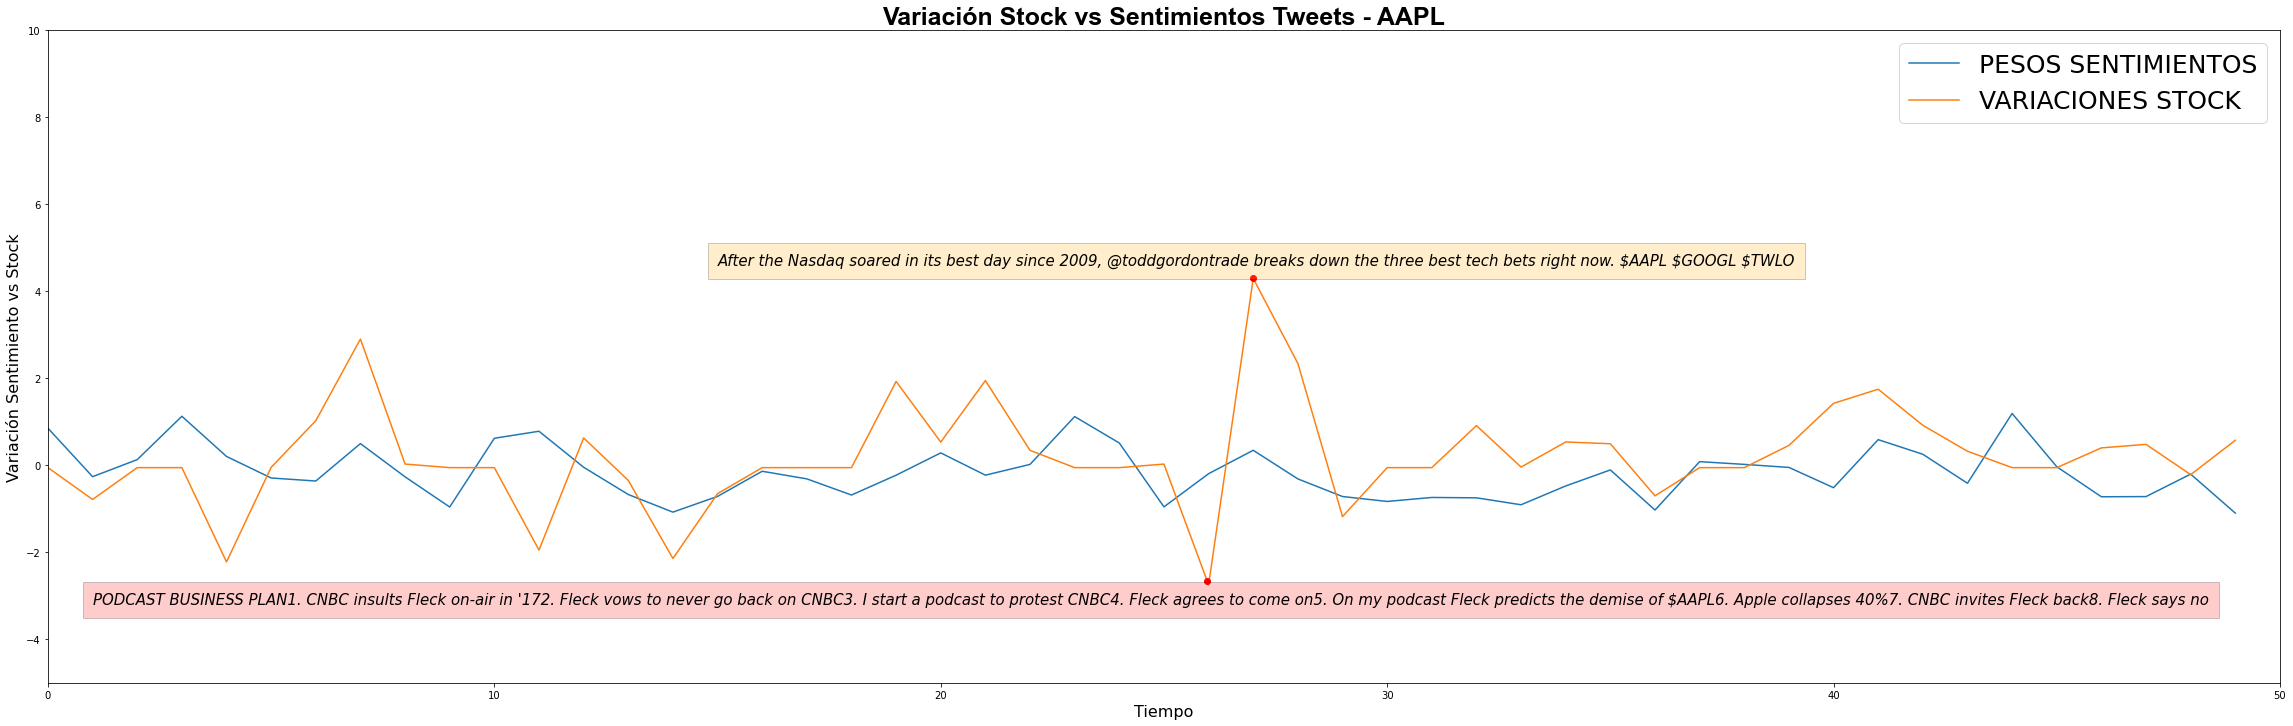

In [51]:
fig, ax = plt.subplots(figsize=(40,12)) #Ajustar ancho y alto del gráfico
plt.plot(w,label="PESOS SENTIMIENTOS")
plt.plot(ee,label="VARIACIONES STOCK")

plt.title("Variación Stock vs Sentimientos Tweets - AAPL", 
          fontdict={'family': 'arial', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 25})


bins=60# Set both x- and y-axis limits to [0, 10] instead of default [0, 1]
ax.axis([0, 50, -5, 10])

ax.text(15, 4.6, body1, style='italic',
        fontsize=15,
        bbox={'facecolor': 'orange', 'alpha': 0.2, 'pad': 10})
ax.text(1, -3.2, body2, style='italic',
        fontsize=15,
        bbox={'facecolor': 'red', 'alpha': 0.2, 'pad': 10})

plt.xlabel("Tiempo", size = 16,)
plt.ylabel("Variación Sentimiento vs Stock", size = 16,)

ax.plot([27], [4.3], 'o',color='red')
ax.plot([25.96], [-2.65], 'o',color='red')

ax.legend(loc='upper right', fontsize=25)
#plt.legend()

Text(0.5, 1.0, 'AAPL_Y_2')

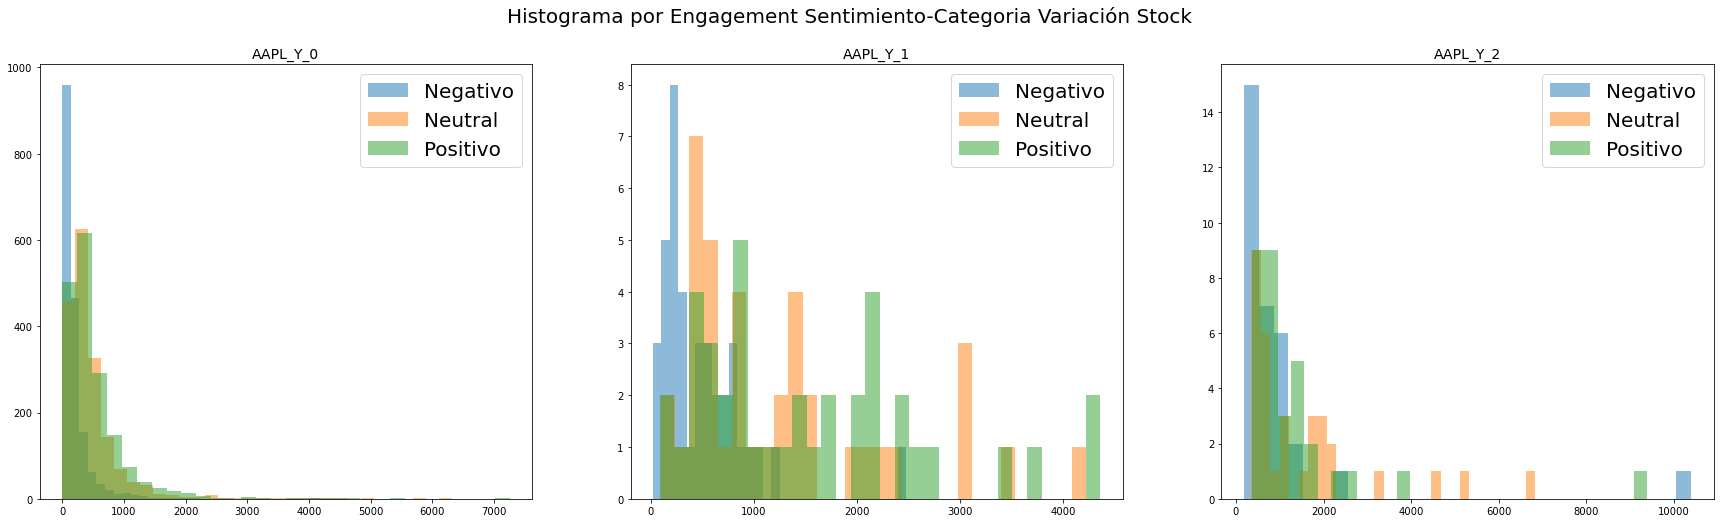

In [52]:
import random
import numpy
import matplotlib.pyplot as plt
import seaborn as sns

x = data.loc[data.Y==0].sum_eng_negative
y = data.loc[data.Y==0].sum_eng_neutral
z = data.loc[data.Y==0].sum_eng_positive

a = data.loc[data.Y==1].sum_eng_negative
b = data.loc[data.Y==1].sum_eng_neutral
c = data.loc[data.Y==1].sum_eng_positive

d = data.loc[data.Y==2].sum_eng_negative
e = data.loc[data.Y==2].sum_eng_neutral
f = data.loc[data.Y==2].sum_eng_positive

#bins = numpy.linspace(0, 5000, 100)
bins=30

fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(30,8))

fig.suptitle('Histograma por Engagement Sentimiento-Categoria Variación Stock', fontsize= 20)

ax1.hist(x, bins, alpha=0.5, label='Negativo')
ax1.hist(y, bins, alpha=0.5, label='Neutral')
ax1.hist(z, bins, alpha=0.5, label='Positivo')
ax1.legend(loc='upper right', fontsize=20)
ax1.set_title('AAPL_Y_0',fontsize=14)

ax2.hist(a, bins, alpha=0.5, label='Negativo')
ax2.hist(b, bins, alpha=0.5, label='Neutral')
ax2.hist(c, bins, alpha=0.5, label='Positivo')
ax2.legend(loc='upper right', fontsize=20)
ax2.set_title('AAPL_Y_1',fontsize=14)

ax3.hist(d, bins, alpha=0.5, label='Negativo')
ax3.hist(e, bins, alpha=0.5, label='Neutral')
ax3.hist(f, bins, alpha=0.5, label='Positivo')
ax3.legend(loc='upper right', fontsize=20)
ax3.set_title('AAPL_Y_2',fontsize=14)

## Nube de palabras con wordcloud

In [53]:
from wordcloud import WordCloud
wordcloud = WordCloud().generate(df_aapl_negative_alltweets)

Populating the interactive namespace from numpy and matplotlib


/opt/anaconda3/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['f', 'e', 'load', 'random']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


(-0.5, 399.5, 199.5, -0.5)

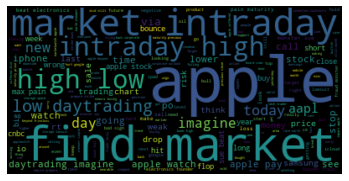

In [54]:
%pylab inline
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

### Neutral = 1

In [55]:
df_aapl_neutral = df_aapl[df_aapl['sentiment_code']==1]
### JOIN ALL TWEETS NEGATIVE
df_aapl_neutral_alltweets  = df_aapl_neutral['clean_tweet'].str.cat(sep = ' ')

#EMBEDDINGS

corpus_aapl_neutral = [df_aapl_neutral_alltweets]
vocabulary_aapl_neutral = np.unique(df_aapl_neutral_alltweets.split(" "))

pipe_aapl_neu = Pipeline([('count', CountVectorizer(vocabulary=vocabulary_aapl_neutral)),
                  ('tfid', TfidfTransformer())]).fit(corpus_aapl_neutral)
pipe_aapl_neu['count'].transform(corpus_aapl_neutral).toarray()

pipe_aapl_neu['tfid'].idf_

pipe_aapl_neu.transform(corpus_aapl_neutral).shape

(1, 2879)

Populating the interactive namespace from numpy and matplotlib


(-0.5, 399.5, 199.5, -0.5)

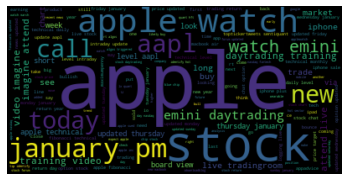

In [56]:
wordcloud_appl_neu = WordCloud().generate(df_aapl_neutral_alltweets)
%pylab inline
import matplotlib.pyplot as plt
plt.imshow(wordcloud_appl_neu, interpolation='bilinear')
plt.axis("off")

### Positive = 2

In [57]:
df_aapl_positive = df_aapl[df_aapl['sentiment_code']==2]
### JOIN ALL TWEETS NEUTRAL
df_aapl_positive_alltweets  = df_aapl_positive['clean_tweet'].str.cat(sep = ' ')

#EMBEDDINGS

corpus_aapl_positive = [df_aapl_positive_alltweets]
vocabulary_aapl_positive = np.unique(df_aapl_positive_alltweets.split(" "))

pipe_aapl_pos = Pipeline([('count', CountVectorizer(vocabulary=vocabulary_aapl_positive)),
                  ('tfid', TfidfTransformer())]).fit(corpus_aapl_positive)
pipe_aapl_pos['count'].transform(corpus_aapl_positive).toarray()

pipe_aapl_pos['tfid'].idf_

pipe_aapl_pos.transform(corpus_aapl_positive).shape

(1, 2860)

Populating the interactive namespace from numpy and matplotlib


(-0.5, 399.5, 199.5, -0.5)

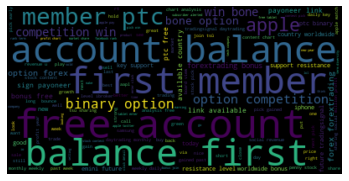

In [58]:
wordcloud_appl_pos = WordCloud().generate(df_aapl_positive_alltweets)
%pylab inline
import matplotlib.pyplot as plt
plt.imshow(wordcloud_appl_pos, interpolation='bilinear')
plt.axis("off")

# TSLA

In [59]:
df_tsla_idx = tweet_head.ticker_symbol_group.apply(lambda a: 'TSLA' in a)
df_tsla= tweet_head[df_tsla_idx]

### Negative = 0

In [60]:
df_tsla_negative = df_tsla[df_tsla['sentiment_code']==0]
### JOIN ALL TWEETS NEGATIVE
df_tsla_negative_alltweets  = df_tsla_negative['clean_tweet'].str.cat(sep = ' ')

#EMBEDDINGS

corpus_tsla_negative = [df_tsla_negative_alltweets]
vocabulary_tsla_negative = np.unique(df_tsla_negative_alltweets.split(" "))

pipe_tsla_nega = Pipeline([('count', CountVectorizer(vocabulary=vocabulary_tsla_negative)),
                  ('tfid', TfidfTransformer())]).fit(corpus_tsla_negative)
pipe_tsla_nega['count'].transform(corpus_tsla_negative).toarray()

pipe_tsla_nega['tfid'].idf_

pipe_tsla_nega.transform(corpus_tsla_negative).shape

(1, 709)

Populating the interactive namespace from numpy and matplotlib


(-0.5, 399.5, 199.5, -0.5)

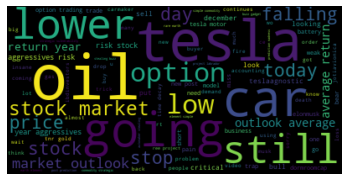

In [61]:
wordcloud_tsla_neg = WordCloud().generate(df_tsla_negative_alltweets)
%pylab inline
import matplotlib.pyplot as plt
plt.imshow(wordcloud_tsla_neg, interpolation='bilinear')
plt.axis("off")

In [62]:
data2 = pd.read_csv('TSLA.csv')
data2 = data2.rename({'date':'post_date'}, axis='columns')
data2.head(2)

,post_date,sum_eng_negative,sum_eng_neutral,sum_eng_positive,negative,neutral,positive,n_tweets,dispersion_tweets_content,Y,Y2
0,2015-01-01,55,43,69,0.232323,0.383838,0.383838,99,0.960857,0,0.000000
1,2015-01-02,43,83,92,0.144279,0.417910,0.437811,201,0.982062,0,-0.013938


In [63]:
dfstla = pd.read_csv('TSLA_weighted_vader.csv')  
dfstla = dfstla.rename(columns = {'date':'post_date','TSLA':'weighted_vader'})
dfstla.head(2)

,post_date,weighted_vader
0,2015-01-01,0.019985
1,2015-01-02,0.119826


## Agregué a la tabla data la columna wighted_vader

In [64]:
data2 = data2.set_index('post_date').join(dfstla.set_index('post_date'))
data2.head(2)

,sum_eng_negative,sum_eng_neutral,sum_eng_positive,negative,neutral,positive,n_tweets,dispersion_tweets_content,Y,Y2,weighted_vader
post_date,,,,,,,,,,,
2015-01-01,55,43,69,0.232323,0.383838,0.383838,99,0.960857,0,0.000000,0.019985
2015-01-02,43,83,92,0.144279,0.417910,0.437811,201,0.982062,0,-0.013938,0.119826


## Buscamos el máximo valor de $Y2$ [La variacion del precio de la accion por dia] para la empresa $TSLA$

In [65]:
data2.loc[data2['Y2']==max(data2['Y2'])]

,sum_eng_negative,sum_eng_neutral,sum_eng_positive,negative,neutral,positive,n_tweets,dispersion_tweets_content,Y,Y2,weighted_vader
post_date,,,,,,,,,,,
2019-10-24,5610,6903,15087,0.204348,0.305072,0.49058,2760,0.989044,1,0.176692,0.234719


In [66]:
data2.loc[data2['Y2']==min(data2['Y2'])]

,sum_eng_negative,sum_eng_neutral,sum_eng_positive,negative,neutral,positive,n_tweets,dispersion_tweets_content,Y,Y2,weighted_vader
post_date,,,,,,,,,,,
2018-09-28,12592,6901,15123,0.310376,0.284492,0.405132,4443,0.986997,2,-0.139015,0.076317


In [67]:
#inicial_completo['post_date'] = inicial_completo['post_date'].dt.date
inicial_completo['post_date'] = pd.to_datetime(inicial_completo['post_date'], errors='coerce')
inicial_completo['post_date'] = inicial_completo['post_date'].dt.strftime('%Y/%m/%d')

In [68]:
#seleccionar AAPL

inicial_completo_tsla_idx = inicial_completo.ticker_symbol_group.apply(lambda a: 'TSLA' in a)
inicial_completo_tsla= inicial_completo[inicial_completo_tsla_idx].copy()

#POSITIVE

tetsla = inicial_completo_tsla.loc[inicial_completo_tsla['post_date'] == '2019/10/24']
tetsla_positiv_en = tetsla.loc[tetsla['sentiment'] == 'positive']
maxi_tetsla = tetsla_positiv_en.loc[tetsla_positiv_en['total_engagement'] == max(tetsla_positiv_en['total_engagement'])]
maxi_tetsla



,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,date,ticker_symbol_group,body_trusted,body_tokenized,body_refined,lemmatized_tokens,clean_tweet,score_vader,sentiment,total_engagement
3589656,1187430268967231488,jack,2019/10/24,Now anyone can buy $42 or even $1 worth of Ber...,298,589,0,2019-10-24,['TSLA'],Now anyone can buy or even worth of Berkshir...,"['Now', 'anyone', 'can', 'buy', 'or', 'even', ...","['anyone', 'buy', 'even', 'worth', 'berkshire'...","['anyone', 'buy', 'even', 'worth', 'berkshire'...",anyone buy even worth berkshire hathaway insta...,0.8955,positive,887


In [69]:
#NEGATIVE

tetslaneg = inicial_completo_tsla.loc[inicial_completo_tsla['post_date'] == '2018/09/28']
tetslaneg_neg_en = tetslaneg.loc[tetslaneg['sentiment'] == 'negative']
maxi_tetslaneg = tetslaneg_neg_en.loc[tetslaneg_neg_en['total_engagement'] == max(tetslaneg_neg_en['total_engagement'])]
maxi_tetslaneg

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,date,ticker_symbol_group,body_trusted,body_tokenized,body_refined,lemmatized_tokens,clean_tweet,score_vader,sentiment,total_engagement
2747955,1045670011220709376,Gfilche,2018/09/28,isn't the SEC's job to protect retail investor...,154,116,669,2018-09-28,['TSLA'],isn't the SEC's job to protect retail investor...,"['is', ""n't"", 'the', 'SEC', ""'s"", 'job', 'to',...","['sec', 'job', 'protect', 'retail', 'investors...","['sec', 'job', 'protect', 'retail', 'investor'...",sec job protect retail investor lot damage inv...,-0.1531,negative,939


In [70]:
body1 = maxi_tetsla['body'][3589656]
body2 = maxi_tetslaneg['body'][2747955]

In [71]:
from sklearn import preprocessing

In [72]:
#Normalizar datos
df_mean = np.mean(data2['weighted_vader'])
df_std = np.std(data2['weighted_vader'])
z = np.array([((data2['weighted_vader']) - df_mean)/df_std]).T
z = pd.DataFrame(z)
#---------------------
y2_mean = np.mean(data2['Y2'])
y2_std = np.std(data2['Y2'])
z_de_y2 = np.array([((data2['Y2'])-y2_mean)/y2_std]).T
z_de_y2 = pd.DataFrame(z_de_y2)
#-----------------
w = z[:50]
y2 = z_de_y2
ee = y2[:50]

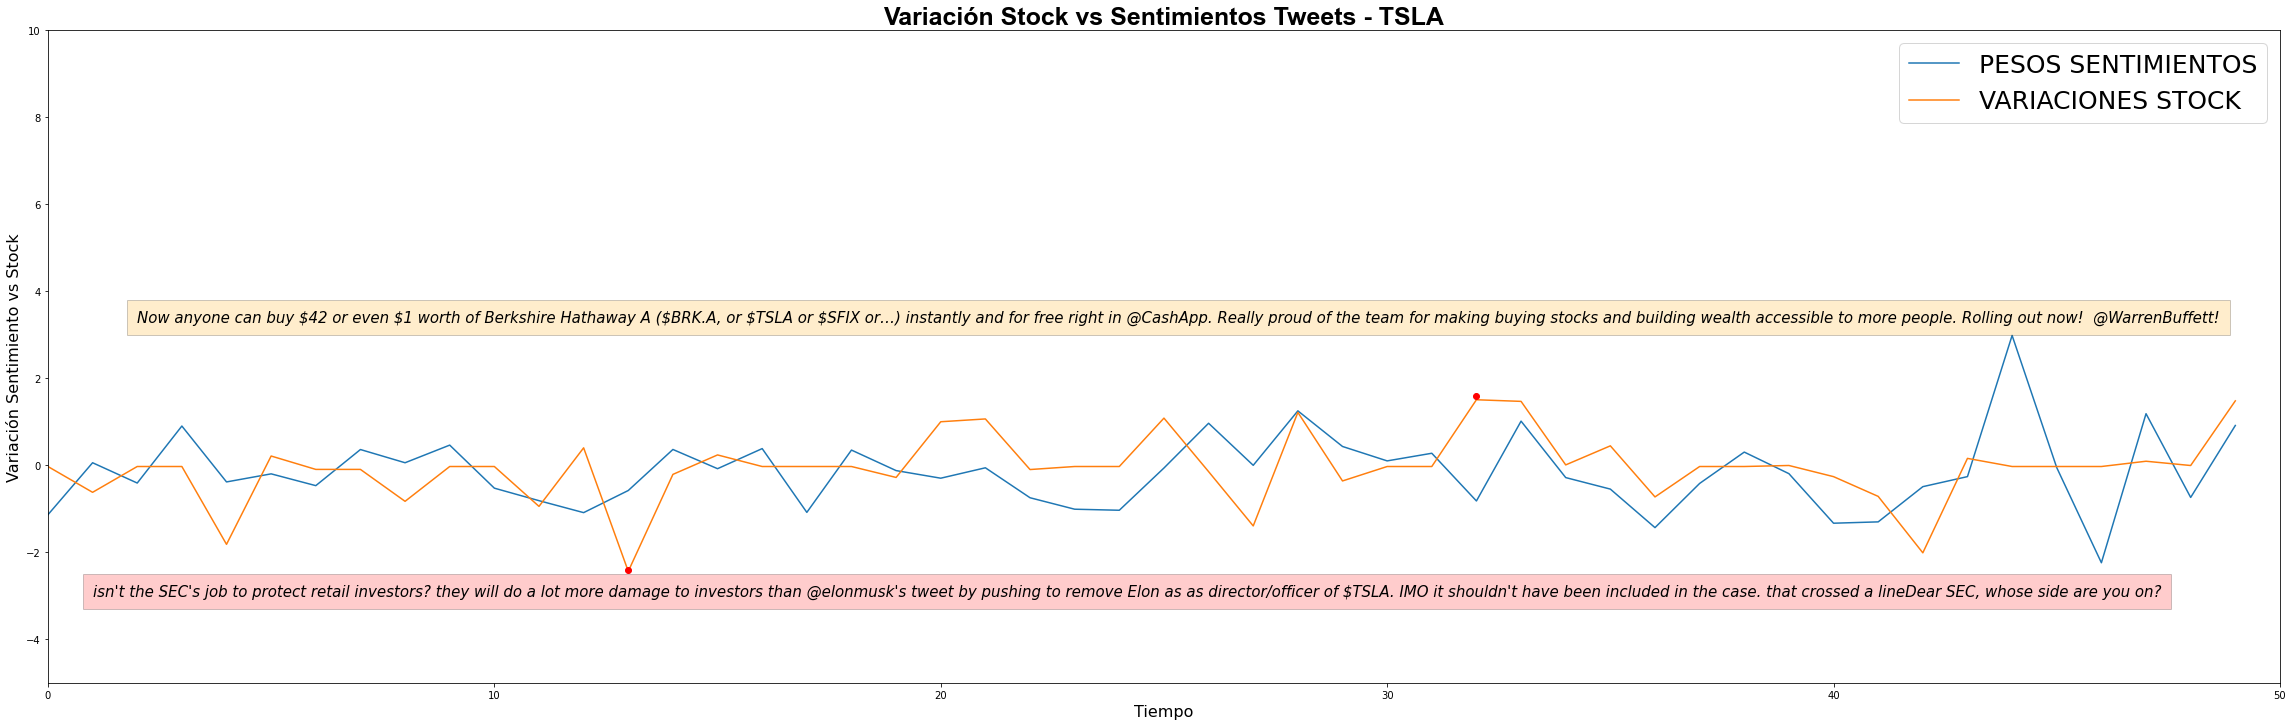

In [73]:
fig, ax = plt.subplots(figsize=(40,12)) #Ajustar ancho y alto del gráfico
plt.plot(w,label="PESOS SENTIMIENTOS")
plt.plot(ee,label="VARIACIONES STOCK")

plt.title("Variación Stock vs Sentimientos Tweets - TSLA", 
          fontdict={'family': 'arial', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 25})


bins=60# Set both x- and y-axis limits to [0, 10] instead of default [0, 1]
ax.axis([0, 50, -5, 10])

ax.text(2, 3.3, body1, style='italic',
        fontsize=15,
        bbox={'facecolor': 'orange', 'alpha': 0.2, 'pad': 10})
ax.text(1, -3, body2, style='italic',
        fontsize=15,
        bbox={'facecolor': 'red', 'alpha': 0.2, 'pad': 10})

plt.xlabel("Tiempo", size = 16,)
plt.ylabel("Variación Sentimiento vs Stock", size = 16,)

ax.plot([32], [1.6], 'o',color='red')
ax.plot([13], [-2.4], 'o',color='red')

ax.legend(loc='upper right', fontsize=25)
#plt.legend()


### Neutral = 1

In [74]:
df_tsla_neutral = df_tsla[df_tsla['sentiment_code']==1]
### JOIN ALL TWEETS NEUTRAL
df_tsla_neutral_alltweets  = df_tsla_neutral['clean_tweet'].str.cat(sep = ' ')

#EMBEDDINGS

corpus_tsla_neutral = [df_tsla_neutral_alltweets]
vocabulary_tsla_neutral = np.unique(df_tsla_neutral_alltweets.split(" "))

pipe_tsla_neu = Pipeline([('count', CountVectorizer(vocabulary=vocabulary_tsla_neutral)),
                  ('tfid', TfidfTransformer())]).fit(corpus_tsla_neutral)
pipe_tsla_neu['count'].transform(corpus_tsla_neutral).toarray()

pipe_tsla_neu['tfid'].idf_

pipe_tsla_neu.transform(corpus_tsla_neutral).shape

(1, 1128)

Populating the interactive namespace from numpy and matplotlib


(-0.5, 399.5, 199.5, -0.5)

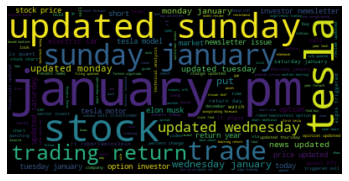

In [75]:
wordcloud_tsla_neu = WordCloud().generate(df_tsla_neutral_alltweets)
%pylab inline
import matplotlib.pyplot as plt
plt.imshow(wordcloud_tsla_neu, interpolation='bilinear')
plt.axis("off")

### Positive = 2

In [76]:
df_tsla_positive = df_tsla[df_tsla['sentiment_code']==2]
### JOIN ALL TWEETS POSITIVE
df_tsla_positive_alltweets  = df_tsla_positive['clean_tweet'].str.cat(sep = ' ')

#EMBEDDINGS

corpus_tsla_pos = [df_tsla_positive_alltweets]
vocabulary_tsla_pos = np.unique(df_tsla_positive_alltweets.split(" "))

pipe_tsla_pos = Pipeline([('count', CountVectorizer(vocabulary=vocabulary_tsla_pos)),
                  ('tfid', TfidfTransformer())]).fit(corpus_tsla_pos)
pipe_tsla_pos['count'].transform(corpus_tsla_pos).toarray()

pipe_tsla_pos['tfid'].idf_

pipe_tsla_pos.transform(corpus_tsla_pos).shape

(1, 1151)

Populating the interactive namespace from numpy and matplotlib


(-0.5, 399.5, 199.5, -0.5)

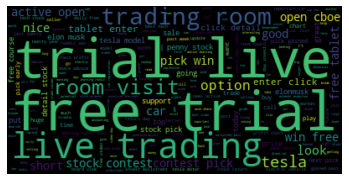

In [77]:
wordcloud_tsla_pos = WordCloud().generate(df_tsla_positive_alltweets)
%pylab inline
import matplotlib.pyplot as plt
plt.imshow(wordcloud_tsla_pos, interpolation='bilinear')
plt.axis("off")

# AMZN

In [78]:
df_amzn_idx = tweet_head.ticker_symbol_group.apply(lambda a: 'AMZN' in a)
df_amzn= tweet_head[df_amzn_idx]

### Negative = 0

In [79]:
df_amzn_negative = df_amzn[df_amzn['sentiment_code']==0]
### JOIN ALL TWEETS NEGATIVE
df_amzn_negative_alltweets  = df_amzn_negative['clean_tweet'].str.cat(sep = ' ')

#EMBEDDINGS

corpus_amzn_negative = [df_amzn_negative_alltweets]
vocabulary_amzn_negative = np.unique(df_amzn_negative_alltweets.split(" "))

pipe_amzn_nega = Pipeline([('count', CountVectorizer(vocabulary=vocabulary_amzn_negative)),
                  ('tfid', TfidfTransformer())]).fit(corpus_amzn_negative)
pipe_amzn_nega['count'].transform(corpus_amzn_negative).toarray()

pipe_amzn_nega['tfid'].idf_

pipe_amzn_nega.transform(corpus_amzn_negative).shape

(1, 553)

Populating the interactive namespace from numpy and matplotlib


(-0.5, 399.5, 199.5, -0.5)

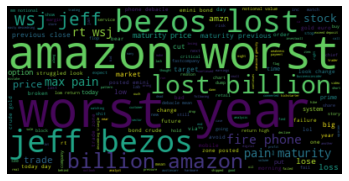

In [80]:
wordcloud_amzn_neg = WordCloud().generate(df_amzn_negative_alltweets)
%pylab inline
import matplotlib.pyplot as plt
plt.imshow(wordcloud_amzn_neg, interpolation='bilinear')
plt.axis("off")

In [81]:
dfamzn = pd.read_csv('AMZN.csv')
dfamzn = dfamzn.rename({'date':'post_date'}, axis='columns')
dfamzn.head(2)

,post_date,sum_eng_negative,sum_eng_neutral,sum_eng_positive,negative,neutral,positive,n_tweets,dispersion_tweets_content,Y,Y2
0,2015-01-01,426,22,488,0.404580,0.274809,0.320611,131,0.694718,0,0.000000
1,2015-01-02,20,51,409,0.155172,0.390805,0.454023,174,0.954603,0,-0.005897


In [82]:
data3 = pd.read_csv('AMZN_weighted_vader.csv')
data3 = data3.rename({'date':'post_date','AMZN':'weighted_vader_amzn'}, axis='columns')
data3.head(2)

,post_date,weighted_vader_amzn
0,2015-01-01,-0.195039
1,2015-01-02,0.199150


### Agregué a la tabla data la columna wighted_vader

In [83]:
dfamzn = dfamzn.set_index('post_date').join(data3.set_index('post_date'))

In [84]:
dfamzn.head(2)

,sum_eng_negative,sum_eng_neutral,sum_eng_positive,negative,neutral,positive,n_tweets,dispersion_tweets_content,Y,Y2,weighted_vader_amzn
post_date,,,,,,,,,,,
2015-01-01,426,22,488,0.404580,0.274809,0.320611,131,0.694718,0,0.000000,-0.195039
2015-01-02,20,51,409,0.155172,0.390805,0.454023,174,0.954603,0,-0.005897,0.199150


In [85]:
from sklearn import preprocessing


### Neutral = 1

In [86]:
df_amzn_neutral = df_amzn[df_amzn['sentiment_code']==1]
### JOIN ALL TWEETS NEUTRAL
df_amzn_neutral_alltweets  = df_amzn_neutral['clean_tweet'].str.cat(sep = ' ')

#EMBEDDINGS

corpus_amzn_neutral = [df_amzn_neutral_alltweets]
vocabulary_amzn_neutral = np.unique(df_amzn_neutral_alltweets.split(" "))

pipe_amzn_neu = Pipeline([('count', CountVectorizer(vocabulary=vocabulary_amzn_neutral)),
                  ('tfid', TfidfTransformer())]).fit(corpus_amzn_neutral)
pipe_amzn_neu['count'].transform(corpus_amzn_neutral).toarray()

pipe_amzn_neu['tfid'].idf_

pipe_amzn_neu.transform(corpus_amzn_neutral).shape

(1, 832)

Populating the interactive namespace from numpy and matplotlib


(-0.5, 399.5, 199.5, -0.5)

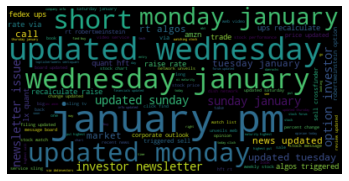

In [87]:
wordcloud_amzn_neu = WordCloud().generate(df_amzn_neutral_alltweets)
%pylab inline
import matplotlib.pyplot as plt
plt.imshow(wordcloud_amzn_neu, interpolation='bilinear')
plt.axis("off")

### Positive = 2

In [88]:
df_amzn_positive = df_amzn[df_amzn['sentiment_code']==2]
### JOIN ALL TWEETS POSITIVE
df_amzn_positive_alltweets  = df_amzn_positive['clean_tweet'].str.cat(sep = ' ')

#EMBEDDINGS

corpus_amzn_pos = [df_amzn_positive_alltweets]
vocabulary_amzn_pos = np.unique(df_amzn_positive_alltweets.split(" "))

pipe_amzn_pos = Pipeline([('count', CountVectorizer(vocabulary=vocabulary_amzn_pos)),
                  ('tfid', TfidfTransformer())]).fit(corpus_amzn_pos)
pipe_amzn_pos['count'].transform(corpus_amzn_pos).toarray()

pipe_amzn_pos['tfid'].idf_

pipe_amzn_pos.transform(corpus_amzn_pos).shape

(1, 1175)

Populating the interactive namespace from numpy and matplotlib


(-0.5, 399.5, 199.5, -0.5)

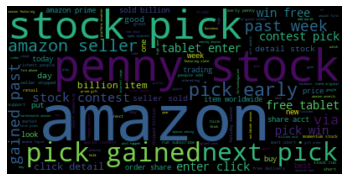

In [89]:
wordcloud_amzn_pos = WordCloud().generate(df_amzn_positive_alltweets)
%pylab inline
import matplotlib.pyplot as plt
plt.imshow(wordcloud_amzn_pos, interpolation='bilinear')
plt.axis("off")

# GOOG

In [90]:
df_goog_idx = tweet_head.ticker_symbol_group.apply(lambda a: 'GOOG' in a)
df_goog= tweet_head[df_goog_idx]

### Negative = 0

In [91]:
df_goog_negative = df_goog[df_goog['sentiment_code']==0]
### JOIN ALL TWEETS NEGATIVE
df_goog_negative_alltweets  = df_goog_negative['clean_tweet'].str.cat(sep = ' ')

#EMBEDDINGS

corpus_goog_negative = [df_goog_negative_alltweets]
vocabulary_goog_negative = np.unique(df_goog_negative_alltweets.split(" "))

pipe_goog_nega = Pipeline([('count', CountVectorizer(vocabulary=vocabulary_goog_negative)),
                  ('tfid', TfidfTransformer())]).fit(corpus_goog_negative)
pipe_goog_nega['count'].transform(corpus_goog_negative).toarray()

pipe_goog_nega['tfid'].idf_

pipe_goog_nega.transform(corpus_goog_negative).shape

(1, 595)

In [92]:
data3 = pd.read_csv('GOOG.csv')
data3 = data3.rename({'date':'post_date'}, axis='columns')
data3.head(2)

,post_date,sum_eng_negative,sum_eng_neutral,sum_eng_positive,negative,neutral,positive,n_tweets,dispersion_tweets_content,Y,Y2
0,2015-01-01,1.0,7.0,28.0,0.100000,0.433333,0.466667,60,0.975170,0,0.00000
1,2015-01-02,12.0,36.0,46.0,0.103448,0.406897,0.489655,145,0.963665,0,-0.00302


In [93]:
dfgoog = pd.read_csv('GOOG_weighted_vader.csv')  
dfgoog = dfgoog.rename(columns = {'date':'post_date','GOOG':'weighted_vader'})
dfgoog.head(2)

,post_date,weighted_vader
0,2015-01-01,0.370033
1,2015-01-02,0.146731


## Agregué a la tabla data la columna wighted_vader

In [94]:
data3 = data3.set_index('post_date').join(dfgoog.set_index('post_date'))
data3.head(2)

,sum_eng_negative,sum_eng_neutral,sum_eng_positive,negative,neutral,positive,n_tweets,dispersion_tweets_content,Y,Y2,weighted_vader
post_date,,,,,,,,,,,
2015-01-01,1.0,7.0,28.0,0.100000,0.433333,0.466667,60,0.975170,0,0.00000,0.370033
2015-01-02,12.0,36.0,46.0,0.103448,0.406897,0.489655,145,0.963665,0,-0.00302,0.146731


## Buscamos el máximo valor de $Y2$ [La variacion del precio de la accion por dia] para la empresa $AAPL$

In [95]:
data3.loc[data3['Y2']==max(data3['Y2'])]

,sum_eng_negative,sum_eng_neutral,sum_eng_positive,negative,neutral,positive,n_tweets,dispersion_tweets_content,Y,Y2,weighted_vader
post_date,,,,,,,,,,,
2015-07-17,105.0,1069.0,956.0,0.103168,0.4013,0.495532,1231,0.976125,1,0.160524,0.206404


In [96]:
data3.loc[data3['Y2']==min(data3['Y2'])]

,sum_eng_negative,sum_eng_neutral,sum_eng_positive,negative,neutral,positive,n_tweets,dispersion_tweets_content,Y,Y2,weighted_vader
post_date,,,,,,,,,,,
2019-04-30,1026.0,482.0,1243.0,0.204583,0.438625,0.356792,611,0.987703,2,-0.076966,0.027902


In [97]:
#inicial_completo['post_date'] = inicial_completo['post_date'].dt.date
inicial_completo['post_date'] = pd.to_datetime(inicial_completo['post_date'], errors='coerce')
inicial_completo['post_date'] = inicial_completo['post_date'].dt.strftime('%Y/%m/%d')

In [98]:
#seleccionar AAPL

inicial_completo_goog_idx = inicial_completo.ticker_symbol_group.apply(lambda a: 'GOOG' in a)
inicial_completo_goog= inicial_completo[inicial_completo_goog_idx].copy()

#POSITIVE

tegoog = inicial_completo_goog.loc[inicial_completo_goog['post_date'] == '2015/07/17']
tegoog_positiv_en = tegoog.loc[tegoog['sentiment'] == 'positive']
maxi_tegoog = tegoog_positiv_en.loc[tegoog_positiv_en['total_engagement'] == max(tegoog_positiv_en['total_engagement'])]
maxi_tegoog



,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,date,ticker_symbol_group,body_trusted,body_tokenized,body_refined,lemmatized_tokens,clean_tweet,score_vader,sentiment,total_engagement
416791,622055898442244096,TradingNation,2015/07/17,Google's $52 billion market cap boost is the b...,3,84,50,2015-07-17,['GOOG' 'GOOGL'],Google's billion market cap boost is the bigg...,"['Google', ""'s"", 'billion', 'market', 'cap', '...","['google', 'billion', 'market', 'cap', 'boost'...","['google', 'billion', 'market', 'cap', 'boost'...",google billion market cap boost biggest gain h...,0.7269,positive,137


In [99]:
#NEGATIVE

tegoogneg = inicial_completo_goog.loc[inicial_completo_goog['post_date'] == '2019/04/30']
tegoog_neg_en = tegoogneg.loc[tegoogneg['sentiment'] == 'negative']
maxi_tegoogneg = tegoog_neg_en.loc[tegoog_neg_en['total_engagement'] == max(tegoog_neg_en['total_engagement'])]
maxi_tegoogneg

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,date,ticker_symbol_group,body_trusted,body_tokenized,body_refined,lemmatized_tokens,clean_tweet,score_vader,sentiment,total_engagement
3257367,1123253303406616576,bgurley,2019/04/30,Interesting to see very large companies get aw...,12,62,304,2019-04-30,['GOOG'],Interesting to see very large companies get aw...,"['Interesting', 'to', 'see', 'very', 'large', ...","['interesting', 'see', 'large', 'companies', '...","['interesting', 'see', 'large', 'company', 'ge...",interesting see large company get away lack se...,-0.4019,negative,378


In [100]:
body1 = maxi_tegoog['body'][416791]
body2 = maxi_tegoogneg['body'][3257367]

In [101]:
from sklearn import preprocessing

In [102]:
#Normalizar datos
df_mean = np.mean(data3['weighted_vader'])
df_std = np.std(data3['weighted_vader'])
z = np.array([((data3['weighted_vader']) - df_mean)/df_std]).T
z = pd.DataFrame(z)
#---------------------
y2_mean = np.mean(data3['Y2'])
y2_std = np.std(data3['Y2'])
z_de_y2 = np.array([((data3['Y2'])-y2_mean)/y2_std]).T
z_de_y2 = pd.DataFrame(z_de_y2)
#-----------------
w = z[:50]
y2 = z_de_y2
ee = y2[:50]

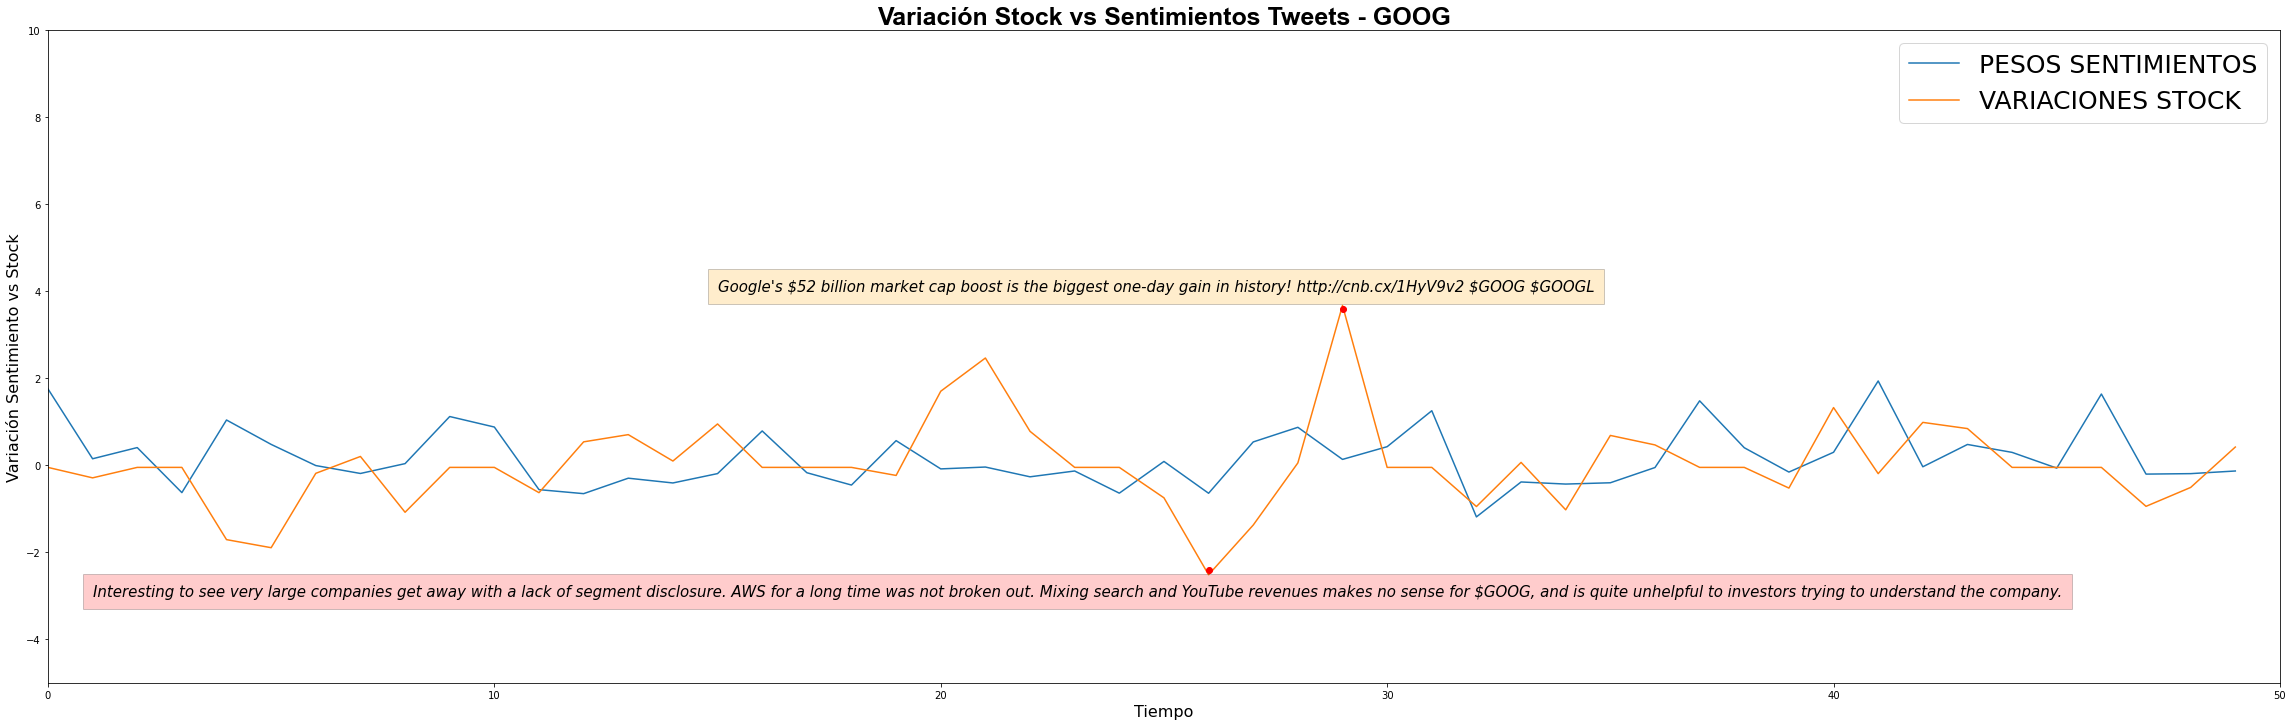

In [103]:
fig, ax = plt.subplots(figsize=(40,12)) #Ajustar ancho y alto del gráfico
plt.plot(w,label="PESOS SENTIMIENTOS")
plt.plot(ee,label="VARIACIONES STOCK")

plt.title("Variación Stock vs Sentimientos Tweets - GOOG", 
          fontdict={'family': 'arial', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 25})


bins=60# Set both x- and y-axis limits to [0, 10] instead of default [0, 1]
ax.axis([0, 50, -5, 10])

ax.text(15, 4, body1, style='italic',
        fontsize=15,
        bbox={'facecolor': 'orange', 'alpha': 0.2, 'pad': 10})
ax.text(1, -3, body2, style='italic',
        fontsize=15,
        bbox={'facecolor': 'red', 'alpha': 0.2, 'pad': 10})

plt.xlabel("Tiempo", size = 16,)
plt.ylabel("Variación Sentimiento vs Stock", size = 16,)

ax.plot([29], [3.6], 'o',color='red')
ax.plot([26], [-2.4], 'o',color='red')

ax.legend(loc='upper right', fontsize=25)
#plt.legend()


### Neutral = 1

In [104]:
df_goog_neutral = df_goog[df_goog['sentiment_code']==1]
### JOIN ALL TWEETS NEUTRAL
df_goog_neutral_alltweets  = df_goog_neutral['clean_tweet'].str.cat(sep = ' ')

#EMBEDDINGS

corpus_goog_neutral = [df_goog_neutral_alltweets]
vocabulary_goog_neutral = np.unique(df_goog_neutral_alltweets.split(" "))

pipe_goog_neu = Pipeline([('count', CountVectorizer(vocabulary=vocabulary_goog_neutral)),
                  ('tfid', TfidfTransformer())]).fit(corpus_goog_neutral)
pipe_goog_neu['count'].transform(corpus_goog_neutral).toarray()

pipe_goog_neu['tfid'].idf_

pipe_goog_neu.transform(corpus_goog_neutral).shape

(1, 955)

### Positive = 2

In [105]:
df_goog_positive = df_goog[df_goog['sentiment_code']==2]
### JOIN ALL TWEETS POSITIVE
df_goog_positive_alltweets  = df_goog_positive['clean_tweet'].str.cat(sep = ' ')

#EMBEDDINGS

corpus_goog_pos = [df_goog_positive_alltweets]
vocabulary_goog_pos = np.unique(df_goog_positive_alltweets.split(" "))

pipe_goog_pos = Pipeline([('count', CountVectorizer(vocabulary=vocabulary_goog_pos)),
                  ('tfid', TfidfTransformer())]).fit(corpus_goog_pos)
pipe_goog_pos['count'].transform(corpus_goog_pos).toarray()

pipe_goog_pos['tfid'].idf_

pipe_goog_pos.transform(corpus_goog_pos).shape

(1, 946)

# GOOGL

In [106]:
df_googl_idx = tweet_head.ticker_symbol_group.apply(lambda a: 'GOOGL' in a)
df_googl= tweet_head[df_googl_idx]

### Negative = 0

In [107]:
df_googl_negative = df_googl[df_googl['sentiment_code']==0]
### JOIN ALL TWEETS NEGATIVE
df_googl_negative_alltweets  = df_googl_negative['clean_tweet'].str.cat(sep = ' ')

#EMBEDDINGS

corpus_googl_negative = [df_googl_negative_alltweets]
vocabulary_googl_negative = np.unique(df_googl_negative_alltweets.split(" "))

pipe_googl_nega = Pipeline([('count', CountVectorizer(vocabulary=vocabulary_googl_negative)),
                  ('tfid', TfidfTransformer())]).fit(corpus_googl_negative)
pipe_googl_nega['count'].transform(corpus_googl_negative).toarray()

pipe_googl_nega['tfid'].idf_

pipe_googl_nega.transform(corpus_googl_negative).shape

(1, 402)


### Neutral = 1

In [108]:
df_googl_neutral = df_googl[df_googl['sentiment_code']==1]
### JOIN ALL TWEETS NEUTRAL
df_googl_neutral_alltweets  = df_googl_neutral['clean_tweet'].str.cat(sep = ' ')

#EMBEDDINGS

corpus_googl_neutral = [df_googl_neutral_alltweets]
vocabulary_googl_neutral = np.unique(df_googl_neutral_alltweets.split(" "))

pipe_googl_neu = Pipeline([('count', CountVectorizer(vocabulary=vocabulary_googl_neutral)),
                  ('tfid', TfidfTransformer())]).fit(corpus_googl_neutral)
pipe_googl_neu['count'].transform(corpus_googl_neutral).toarray()

pipe_googl_neu['tfid'].idf_

pipe_googl_neu.transform(corpus_googl_neutral).shape

(1, 675)

### Positive = 2

In [109]:
df_googl_positive = df_googl[df_googl['sentiment_code']==2]
### JOIN ALL TWEETS POSITIVE
df_googl_positive_alltweets  = df_googl_positive['clean_tweet'].str.cat(sep = ' ')

#EMBEDDINGS

corpus_googl_pos = [df_googl_positive_alltweets]
vocabulary_googl_pos = np.unique(df_googl_positive_alltweets.split(" "))

pipe_googl_pos = Pipeline([('count', CountVectorizer(vocabulary=vocabulary_googl_pos)),
                  ('tfid', TfidfTransformer())]).fit(corpus_googl_pos)
pipe_googl_pos['count'].transform(corpus_googl_pos).toarray()

pipe_googl_pos['tfid'].idf_

pipe_googl_pos.transform(corpus_googl_pos).shape

(1, 782)

# MSFT

In [110]:
df_msft_idx = tweet_head.ticker_symbol_group.apply(lambda a: 'MSFT' in a)
df_msft = tweet_head[df_msft_idx]

### Negative = 0

In [111]:
df_msft_negative = df_msft[df_msft['sentiment_code']==0]
### JOIN ALL TWEETS NEGATIVE
df_msft_negative_alltweets  = df_msft_negative['clean_tweet'].str.cat(sep = ' ')

#EMBEDDINGS

corpus_msft_negative = [df_msft_negative_alltweets]
vocabulary_msft_negative = np.unique(df_msft_negative_alltweets.split(" "))

pipe_msft_nega = Pipeline([('count', CountVectorizer(vocabulary=vocabulary_msft_negative)),
                  ('tfid', TfidfTransformer())]).fit(corpus_msft_negative)
pipe_msft_nega['count'].transform(corpus_msft_negative).toarray()

pipe_msft_nega['tfid'].idf_

pipe_msft_nega.transform(corpus_msft_negative).shape

(1, 348)


### Neutral = 1

In [112]:
df_msft_neutral = df_msft[df_msft['sentiment_code']==1]
### JOIN ALL TWEETS NEUTRAL
df_msft_neutral_alltweets  = df_msft_neutral['clean_tweet'].str.cat(sep = ' ')

#EMBEDDINGS

corpus_msft_neutral = [df_msft_neutral_alltweets]
vocabulary_msft_neutral = np.unique(df_msft_neutral_alltweets.split(" "))

pipe_msft_neu = Pipeline([('count', CountVectorizer(vocabulary=vocabulary_msft_neutral)),
                  ('tfid', TfidfTransformer())]).fit(corpus_msft_neutral)
pipe_msft_neu['count'].transform(corpus_msft_neutral).toarray()

pipe_msft_neu['tfid'].idf_

pipe_msft_neu.transform(corpus_msft_neutral).shape

(1, 697)

### Positive = 2

In [113]:
df_msft_positive = df_msft[df_msft['sentiment_code']==2]
### JOIN ALL TWEETS POSITIVE
df_msft_positive_alltweets  = df_msft_positive['clean_tweet'].str.cat(sep = ' ')

#EMBEDDINGS

corpus_msft_pos = [df_msft_positive_alltweets]
vocabulary_msft_pos = np.unique(df_msft_positive_alltweets.split(" "))

pipe_msft_pos = Pipeline([('count', CountVectorizer(vocabulary=vocabulary_msft_pos)),
                  ('tfid', TfidfTransformer())]).fit(corpus_msft_pos)
pipe_msft_pos['count'].transform(corpus_msft_pos).toarray()

pipe_msft_pos['tfid'].idf_

pipe_msft_pos.transform(corpus_msft_pos).shape

(1, 654)

# Total Engagement

In [114]:
total_engagement = tweet_head["comment_num"] + tweet_head["retweet_num"] + tweet_head["like_num"]
tweet_head["total_engangement"] = pd.DataFrame(total_engagement)

In [115]:
#import multiprocessing
#from word2vec import Word2Vec
#import os

#from gensim.models import Word2Vec
#cores = multiprocessing.cpu_count()
#w2v_model = Word2Vec(min_count=20,
#                     window=2,
#                     #size=300,
#                     sample=6e-5, 
#                     alpha=0.03, 
#                     min_alpha=0.0007, 
#                     negative=20,
#                     workers=cores-1)
#t = time()

#w2v_model.build_vocab(corpus_aapl_negative, progress_per=10000)
#w2v_model.train(corpus_aapl_negative, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

#print('Time to build vocab: {} mins'.format(round((time() - t) / 60, 2)))

